# Purpose

Aim of this ipynb is to explore the user dataset and identify what course platforms that the users are using to learn there coding and tech related skills

# EDA for User Dataset

## Load Data

In [18]:
import os
import pandas as pd

# Set the directory where the CSV file is located
directory = '/Users/auroraxu/Desktop/BT4222/BT4222 Proj Code/Data/User/'

# Name of the CSV file
file_name = 'survey_results_public.csv'

# Full path to the CSV file
file_path = os.path.join(directory, file_name)
df = pd.read_csv(file_path)

In [7]:
df.head(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [9]:
df.shape

(89184, 84)

## Extract Sub Dataset

In [10]:
# Pick the columns that we want to use
# we want to create a user profile based on
# 1. Basic Information
# 2. Education, Work, and Career
# 3. Technology and Tech Culture


# Thus the following columns are selected:
# Age, Employment
# EdLevel, LearnCode, LearnCodeOnline, LearnCodeCoursesCert, YearsCode, DevType, Currency, CompTotal
# Language, Database, Platform, Webframe, MiscTech, ToolsTech, NEWCollabTools, OpSys, OfficeStackAsync, OfficeStackSync, AISearch, AIDev

Basic_extract = ['Age', 'Employment']
Edu_Work_extract = ['EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'DevType', 'Currency', 'CompTotal']
Tech_extract = [
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
    'OpSysPersonal use', 'OpSysProfessional use',
    'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
    'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
    'AIDevHaveWorkedWith', 'AIDevWantToWorkWith'
]


all_columns_to_extract = Basic_extract + Edu_Work_extract + Tech_extract
extracted_df = df[all_columns_to_extract]

In [11]:
# check df
print(extracted_df.head())
print(extracted_df.info())


               Age                                         Employment  \
0  18-24 years old                                                NaN   
1  25-34 years old                                Employed, full-time   
2  45-54 years old                                Employed, full-time   
3  25-34 years old                                Employed, full-time   
4  25-34 years old  Employed, full-time;Independent contractor, fr...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family 

## NA Check

In [12]:
# check NA
print(extracted_df.isna().sum())
# check percentage of NA
print(extracted_df.isna().mean())

Age                                   0
Employment                         1286
EdLevel                            1211
LearnCode                          1521
LearnCodeOnline                   19100
LearnCodeCoursesCert              52108
YearsCode                          1749
DevType                           12312
Currency                          23850
CompTotal                         40959
LanguageHaveWorkedWith             2044
LanguageWantToWorkWith             8475
DatabaseHaveWorkedWith            15749
DatabaseWantToWorkWith            28273
PlatformHaveWorkedWith            25556
PlatformWantToWorkWith            37876
WebframeHaveWorkedWith            22246
WebframeWantToWorkWith            32443
MiscTechHaveWorkedWith            32165
MiscTechWantToWorkWith            42336
ToolsTechHaveWorkedWith           11300
ToolsTechWantToWorkWith           20869
NEWCollabToolsHaveWorkedWith       3320
NEWCollabToolsWantToWorkWith      12535
OpSysPersonal use                  2627


In [13]:
# DevType
df['DevType'].value_counts()

Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Cloud infrastructure engineer                     1036
Developer, game or graphics                        866
Data or business analyst                           837
System adm

## Unique Values Checking

In [14]:
# check Industry unique values
df['Industry'].value_counts()

Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: Industry, dtype: int64

In [15]:
# check LearnCodeOnline
df['LearnCodeOnline'].unique()

array([nan,
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow',
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow',
       ...,
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Stack Overflow;Certification videos;Other (Please specify):',
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Written-based Online Cou

In [16]:
# LearnCode
df['LearnCode'].unique()

# Split the 'LearnCodeCoursesCert' column by ';' and then explode it into a long Series
LearnCode = df['LearnCode'].str.split(';').explode()

# Count occurrences of each value
LearnCode_occurrence = LearnCode.value_counts()
print(LearnCode_occurrence)
print()
# percentage of each value
LearnCode_percentage = LearnCode_occurrence / len(LearnCode)
print(LearnCode_percentage)

Other online resources (e.g., videos, blogs, forum)    70244
Books / Physical media                                 45406
School (i.e., University, College, etc)                43957
Online Courses or Certification                        43201
On the job training                                    40380
Colleague                                              20523
Friend or family member                                 9936
Coding Bootcamp                                         8602
Hackathons (virtual or in-person)                       7033
Other (please specify):                                 5451
Name: LearnCode, dtype: int64

Other online resources (e.g., videos, blogs, forum)    0.237107
Books / Physical media                                 0.153267
School (i.e., University, College, etc)                0.148376
Online Courses or Certification                        0.145824
On the job training                                    0.136302
Colleague                              

## Pie Chart for Online Course Platform

/var/folders/sg/0xjmcw_15nq41ctx8fknnyhw0000gn/T/ipykernel_12852/84257814.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Oranges')


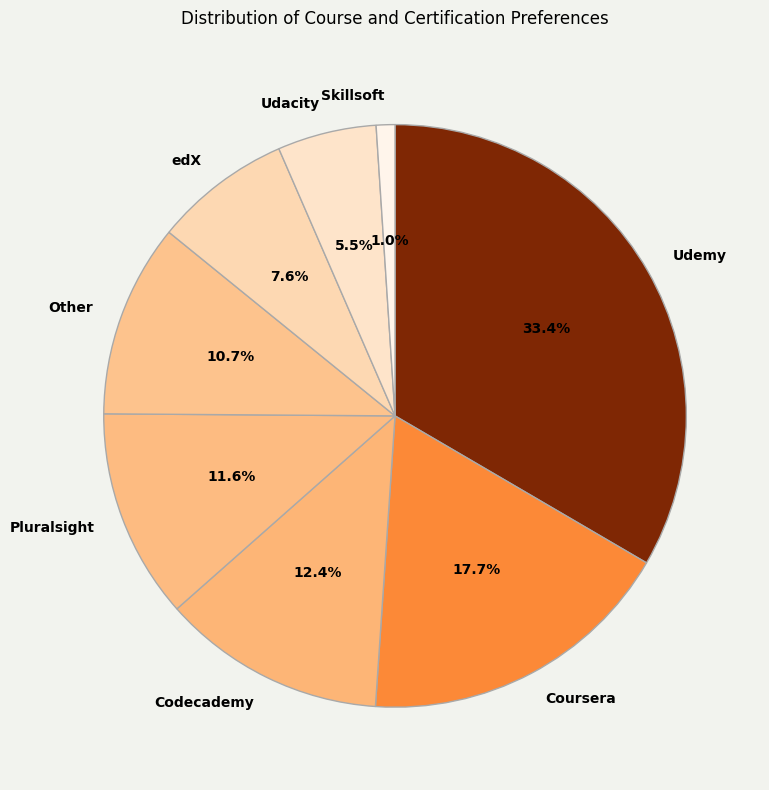

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Split the 'LearnCodeCoursesCert' column by ';' and then explode it into a long Series
LearnCodeCoursesCert = extracted_df['LearnCodeCoursesCert'].str.split(';').explode()

# Count occurrences of each value
occurrence = LearnCodeCoursesCert.value_counts()

# Normalize occurrence values for color mapping
norm = plt.Normalize(occurrence.min(), occurrence.max())
# Choose a colormap
cmap = cm.get_cmap('Oranges')
# Create color mapping based on normalized values
colors = cmap(norm(occurrence.values))

# Plot the occurrences using a pie chart with dynamically generated colors
fig, ax = plt.subplots()
occurrence.plot.pie(autopct="%.1f%%", ax=ax, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'darkgray'}, colors=colors)

# Beautification (keeping the enhancements you preferred from the previous example)
ax.set_ylabel('')  # Remove the y-label
ax.set_title('Distribution of Course and Certification Preferences', pad=20)  # Title for the chart

fig.patch.set_facecolor((242/255, 243/255, 238/255, 1))  # rgba(242,243,238,255)

# Improve legibility
plt.setp(ax.texts, fontweight=600)  # Bold text labels
ax.figure.set_size_inches(8, 8)  # Figure size adjustment

plt.tight_layout()
plt.show()